## 指标评价

#### 分类算法常见的评估指标如下：

* 对于二类分类器/分类算法，评价指标主要有accuracy， [Precision，Recall，F-score，Pr曲线]，ROC-AUC曲线。
* 对于多类分类器/分类算法，评价指标主要有accuracy， [宏平均和微平均，F-score]。

#### 对于回归预测类常见的评估指标如下:

* 平均绝对误差（Mean Absolute Error，MAE），均方误差（Mean Squared Error，MSE），平均绝对百分误差（Mean Absolute Percentage Error，MAPE），均方根误差（Root Mean Squared Error）， R2（R-Square）

**平均绝对误差**
**平均绝对误差（Mean Absolute Error，MAE）**:平均绝对误差，其能更好地反映预测值与真实值误差的实际情况，其计算公式如下：
$$
MAE=\frac{1}{N} \sum_{i=1}^{N}\left|y_{i}-\hat{y}_{i}\right|
$$

**均方误差**
**均方误差（Mean Squared Error，MSE）**,均方误差,其计算公式为：
$$
MSE=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

**R2（R-Square）的公式为**：
残差平方和：
$$
SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
总平均值:
$$
SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}
$$

其中$\overline{y}$表示$y$的平均值
得到$R^2$表达式为：
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$
$R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

$y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。

**1. 分类指标**

In [77]:
from sklearn import metrics

y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 1]
y_scores = np.array([0.1, 0.65, 0.75, 0.1])
print('ACC:',metrics.accuracy_score(y_true, y_pred))
print('Precision',metrics.precision_score(y_true, y_pred))
print('Recall',metrics.recall_score(y_true, y_pred))
print('F1-score:',metrics.f1_score(y_true, y_pred))
print('AUC socre:',metrics.roc_auc_score(y_true, y_scores))

ACC: 0.75
Precision 1.0
Recall 0.6666666666666666
F1-score: 0.8
AUC socre: 0.8333333333333333


In [95]:
# 根据定义自建函数
class Mymetrics:
    
    # 准确率
    def accuracy_score(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return np.sum(np.equal(y_pred, y_true)) / len(y_pred)
    
    # 精确率
    def precision_score(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return sum(j == i == 1 for i,j in zip(y_pred, y_true)) / np.sum(y_pred)
    
    # 召回率
    def recall_score(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return sum(j == i == 1 for i,j in zip(y_pred, y_true)) / np.sum(y_true)
    
    # F1-score
    def f1_score(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return 2 / (1 / Mymetrics.precision_score(y_true, y_pred) + 1 / Mymetrics.recall_score(y_true, y_pred))
    
y_pred = [0, 1, 0, 1]
y_true = [0, 1, 1, 1]
print('ACC:',Mymetrics.accuracy_score(y_true, y_pred))
print('Precision',Mymetrics.precision_score(y_true, y_pred))
print('Recall',Mymetrics.recall_score(y_true, y_pred))
print('F1-score:',Mymetrics.f1_score(y_true, y_pred))

ACC: 0.75
Precision 1.0
Recall 0.6666666666666666
F1-score: 0.8


<font color='red'>AUC的计算函数暂时不知道怎么写！</font>

**2.回归指标评价计算示例**

In [79]:
import numpy as np
from sklearn import metrics

# MAPE需要自己实现
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))

y_true = np.array([1.0, 5.0, 4.0, 3.0, 2.0, 5.0, -3.0])
y_pred = np.array([1.0, 4.5, 3.8, 3.2, 3.0, 4.8, -2.2])

# MSE
print('MSE:',metrics.mean_squared_error(y_true, y_pred))
# RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
# MAE
print('MAE:',metrics.mean_absolute_error(y_true, y_pred))
# MAPE
print('MAPE:',mape(y_true, y_pred))
# R2-score
print('R2-score:',metrics.r2_score(y_true, y_pred))

MSE: 0.2871428571428571
RMSE: 0.5358571238146014
MAE: 0.4142857142857143
MAPE: 0.1461904761904762
R2-score: 0.957874251497006


In [100]:
# 根据定义自建函数
class Mymetrics(Mymetrics):
    
    # 均方差
    def mean_squared_error(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return np.mean(np.square(y_true - y_pred))
    
    # 均方根误差
    def r_mean_squared_error(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return np.sqrt(Mymetrics.mean_squared_error(y_true, y_pred))
    
    # 平均绝对误差
    def mean_absolute_error(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return np.mean(np.abs(y_true - y_pred))
    
    # 平均绝对百分误差
    def mean_absolute_percent_error(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return np.mean(np.abs((y_true - y_pred) / y_true))
    
    # R方
    def r2_score(y_true, y_pred):
        assert len(y_true) == len(y_pred), "len(y_pred) must equal len(y_true)"
        return 1 - np.sum(np.square(y_true - y_pred)) / np.sum(np.square(y_true - np.mean(y_true)))
    
y_true = np.array([1.0, 5.0, 4.0, 3.0, 2.0, 5.0, -3.0])
y_pred = np.array([1.0, 4.5, 3.8, 3.2, 3.0, 4.8, -2.2])

# MSE
print('MSE:',Mymetrics.mean_squared_error(y_true, y_pred))
# RMSE
print('RMSE:',Mymetrics.r_mean_squared_error(y_true, y_pred))
# MAE
print('MAE:',Mymetrics.mean_absolute_error(y_true, y_pred))
# MAPE
print('MAPE:',Mymetrics.mean_absolute_percent_error(y_true, y_pred))
# R2-score
print('R2-score:',Mymetrics.r2_score(y_true, y_pred))

MSE: 0.2871428571428571
RMSE: 0.5358571238146014
MAE: 0.4142857142857143
MAPE: 0.1461904761904762
R2-score: 0.957874251497006


### 赛题数据分析

In [6]:
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. 读取数据

In [67]:
def load_data(filename = 'used_car_train_20200313', sep = ' '):
    myzip=ZipFile('data/%s.zip'%filename)
    f = myzip.open('%s.csv'%filename)
    Train_data = pd.read_csv(f, sep=sep)
    f.close()
    myzip.close()
    return Train_data

Train_data = load_data('used_car_train_20200313')
Test_data = load_data('used_car_testA_20200313')
print(Train_data.shape, Test_data.shape)

(150000, 31) (50000, 30)


### 2. 查看数据概况

* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* seller - 销售方
* offerType - 报价类型
* creatDate - 广告发布时间
* price - 汽车价格
* v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评论、标签等大量信息得到的embedding向量）【人工构造 匿名特征】

#### 2.1 查看数据表中的值

In [8]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


#### 2.2 数据信息

In [11]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [29]:
Train_data.notRepairedDamage = Train_data.notRepairedDamage.replace('-',2.0)
Train_data.notRepairedDamage = Train_data.notRepairedDamage.astype(float)

#### 2.3 数据描述

In [30]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [36]:
from scipy import stats  
def Mydescribe(data, columns = None):
    data = np.array(data)
    if data.ndim == 1:
        data = np.array(data).reshape(-1,1)
    des = {}
    # 均值
    des['均值'] = data.mean(axis=0)
    # 分位数 0, 0.25, 0.5, 0.75, 1.0
    data_quantile = np.quantile(data, q=[0.,0.25,0.5,0.75,1.], axis = 0)
    # 方差
    des['方差'] = data.var(axis=0)
    # 标准差
    des['标准差'] = data.std(axis=0)
    # 极差
    des['极差'] = data.max(axis=0) - data.min(axis=0)
    # 四分位数
    des['四分位数'] = data_quantile[3,:] - data_quantile[1,:] 
    # 变异系数
    des['变异系数'] = des['标准差'] / des['均值']
    # 众数
    des['众数'] = stats.mode(data)[0][0]
    # 偏度
    data = pd.DataFrame(data)
    des['偏度'] = np.array(data.skew())
    # 峰度
    des['峰度'] = np.array(data.kurt())
    
    res = pd.DataFrame(des).T
    if columns is not None:
        res.columns = columns
    return res

Mydescribe(Train_data.dropna(how='any'), columns = Train_data.columns)

<ipython-input-36-6f859b4241b7>:20: RuntimeWarning: invalid value encountered in true_divide
  des['变异系数'] = des['标准差'] / des['均值']


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
均值,7.503499e+04,6.714437e+04,2.003610e+07,47.966810,8.027627,1.801618,0.375423,0.228548,124.201076,12.564713,...,0.256032,0.046786,0.089826,0.058775,0.063074,-0.373742,-0.469310,-0.076532,0.025200,0.008456
方差,1.875660e+09,3.716385e+09,2.897027e+09,2479.378031,61.843707,3.125690,0.299904,0.176314,29900.535670,15.189472,...,0.000196,0.002716,0.001883,0.000842,0.001251,12.046729,3.527875,5.438760,1.666467,1.103367
标准差,4.330889e+04,6.096216e+04,5.382404e+04,49.793353,7.864077,1.767962,0.547635,0.419897,172.917714,3.897367,...,0.014009,0.052114,0.043399,0.029019,0.035364,3.470840,1.878264,2.332115,1.290917,1.050413
极差,1.499990e+05,1.968120e+05,2.412110e+05,246.000000,39.000000,7.000000,6.000000,1.000000,17932.000000,14.500000,...,0.088120,0.151420,0.250896,0.151107,0.213617,15.000142,9.284824,17.439760,9.324672,9.290549
四分位数,7.503150e+04,1.065928e+05,8.910600e+04,55.000000,12.000000,3.000000,1.000000,0.000000,75.000000,5.000000,...,0.020155,0.102994,0.061169,0.044098,0.053421,6.567100,3.149814,3.541794,2.005890,1.127450
变异系数,5.771826e-01,9.079266e-01,2.686354e-03,1.038079,0.979627,0.981319,1.458714,1.837240,1.392240,0.310184,...,0.054717,1.113883,0.483140,0.493729,0.560677,-9.286728,-4.002182,-30.472473,51.226532,124.214893
众数,0.000000e+00,3.870000e+02,2.003031e+07,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,15.000000,...,0.269406,0.000000,0.000000,0.000000,0.000000,2.329386,-2.255591,0.847433,-1.698497,0.003015
偏度,-5.017482e-04,5.871057e-01,-1.193746e-02,1.459605,1.162762,0.972565,1.563738,1.292960,66.829503,-1.473238,...,-0.282032,0.299824,-0.264727,0.182139,0.428692,-0.319295,-0.062689,0.073552,0.249249,-1.203489
峰度,-1.200640e+00,-1.004657e+00,-7.062029e-01,1.638990,1.100271,0.149013,5.518861,-0.328260,5805.373897,0.961689,...,-0.469348,-1.789926,-0.513439,-0.673294,-0.320555,-1.508511,-0.975637,-0.578537,-0.484343,2.350805


#### 2.4 缺失值分析

In [25]:
(Train_data.isna().sum() / len(Train_data))[Train_data.isna().sum()>0].sort_values(ascending=False)

fuelType    0.057867
gearbox     0.039873
bodyType    0.030040
model       0.000007
dtype: float64

**缺失比例:**
    
- fuelType - 燃油类型   5.8%   
- gearbox - 变速箱      4.0%
- bodyType - 车身类型   3.0%
- model - 车型编码      <1.0%

#### 2.5 相关性

只查看非人工构造的特征属性。

<AxesSubplot:>

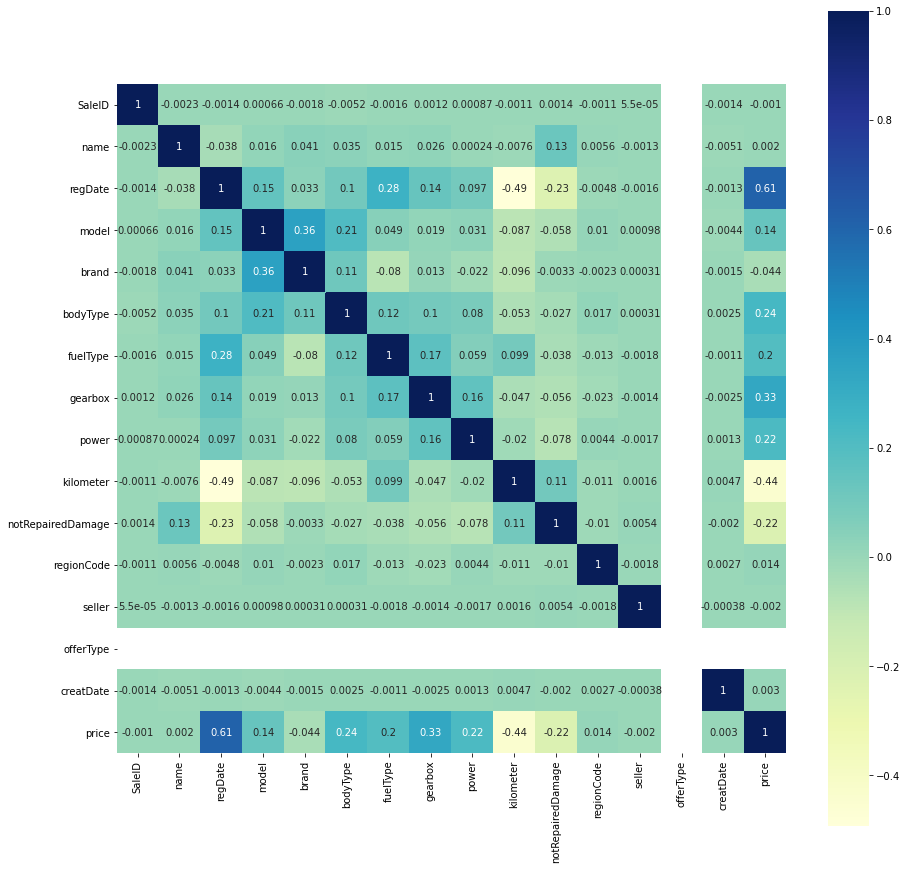

In [47]:
features = [i for i in Train_data.columns if 'v' not in i]
cor = Train_data[features].corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(cor, annot=True, #vmax=1, vmin=-1,
                xticklabels=True,
                yticklabels=True, square=True, cmap="YlGnBu")
# ax.set_title(' Heat Map ', fontsize=18)

In [68]:
# 先归一化 清洗数据
from sklearn.preprocessing import MinMaxScaler
def processing_data(data):
    data.notRepairedDamage = data.notRepairedDamage.replace('-',2.0)
    data.notRepairedDamage = data.notRepairedDamage.astype(float)
    
    # 填补缺失值
    for i in ['fuelType', 'gearbox', 'bodyType', 'model']:
        data[i].fillna(data[i].value_counts().index[0], inplace = True)
        data[i] = data[i].astype(float)
    
    for i in data.columns:
        if i == 'price':
            data[i] = np.log(data[i])
        else:
            std = MinMaxScaler()
            data[i] = std.fit_transform(data[i].values.reshape(-1, 1))
    return data

Train_data_re = processing_data(Train_data.copy())
Train_data_re.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.500000,0.347282,0.514775,0.190804,0.206480,0.248361,0.059016,0.215973,0.006178,0.834287,...,0.850484,0.296679,0.088753,0.361611,0.278274,0.425882,0.228379,0.410620,0.271489,0.430508
std,0.288678,0.310468,0.222419,0.200551,0.201666,0.251540,0.089958,0.411497,0.009174,0.270316,...,0.156950,0.341718,0.143358,0.181514,0.160206,0.175254,0.134801,0.107184,0.084239,0.068312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.056684,0.335437,0.040486,0.025641,0.000000,0.000000,0.000000,0.003884,0.827586,...,0.834762,0.000252,0.044467,0.219749,0.152298,0.253001,0.147952,0.330719,0.202339,0.401811
50%,0.500000,0.262372,0.501267,0.121457,0.153846,0.142857,0.000000,0.000000,0.005696,1.000000,...,0.883359,0.005363,0.068235,0.354582,0.262509,0.501378,0.213320,0.404848,0.269100,0.439843
75%,0.750000,0.603831,0.667913,0.267206,0.333333,0.428571,0.166667,0.000000,0.007767,1.000000,...,0.909056,0.673686,0.089145,0.493694,0.392709,0.558069,0.279491,0.486070,0.333084,0.475301
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
